# Data Exploration and cleaning
Ordnungsamt

Author: Karina Condeixa

#### Content:
- Exploratory Analysis oof the Dataset
- Check unique values of columns
- Clean subject column keeping only "Sperrmüll abgelagert"
- Break the column item in 12 parts and translate
- Join the text of column item 

#### Limitations:
Many items are not complete and the compound words are not so refined to identify this. For example, cupboard part, fridge door, washing machine drum.



In [64]:
# import the packages
import pandas as pd

In [65]:
# set maximum number of rows
pd.set_option('display.max_rows', 500) # 5410
pd.set_option('display.max_columns', 500) # 5410

In [66]:
# read the data and transform in dataframe
df = pd.read_csv('data/data_ordnungsamt.csv') # Ordnungsamt

## Exploratory Analysis of the Dataset

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5408 entries, 0 to 5407
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5408 non-null   int64 
 1   meldungsNummern   5408 non-null   object
 2   bezirk            5408 non-null   object
 3   betreff           5408 non-null   object
 4   erstellungsDatum  5408 non-null   object
 5   status            5408 non-null   object
 6   sachverhalt       5388 non-null   object
dtypes: int64(1), object(6)
memory usage: 295.9+ KB


In [68]:
# check the headers
df.columns

Index(['id', 'meldungsNummern', 'bezirk', 'betreff', 'erstellungsDatum',
       'status', 'sachverhalt'],
      dtype='object')

In [69]:
# make a copy of the df
df_clean = df.copy()

## Count values occurrence

In [70]:
# count values 
# df['meldungsNummern'].value_counts()    # >> many messages numbers unique and some repeated    


In [71]:
# count values
df['bezirk'].value_counts()

Tempelhof-Schöneberg          2701
Neukölln                      1489
Friedrichshain-Kreuzberg       931
Pankow                          87
Spandau                         50
Lichtenberg                     42
Treptow-Köpenick                38
Reinickendorf                   35
Steglitz-Zehlendorf             28
Marzahn-Hellersdorf              6
Charlottenburg-Wilmersdorf       1
Name: bezirk, dtype: int64

In [72]:
# count values
df['betreff'].value_counts()

Sperrmüll abgelagert                                                                      612
Abfall - Müllablagerung                                                                   586
Abfall - Sperrmüll                                                                        538
Müllablagerung                                                                            340
Abfall - Schrottfahrräder                                                                 259
Abfall - Sonstiges                                                                        236
Bauabfälle abgelagert                                                                     225
Abfall - Bauabfälle, Bauschutt                                                            214
Elektroschrott abgelagert                                                                 208
Straßenaufsicht - Straßen- und Gehwegschäden                                              183
Abfall - Elektroschrott                                     

In [73]:
# count values
# df['erstellungsDatum'].value_counts()

In [74]:
# count values
df['status'].value_counts()

Erledigt          3468
In Bearbeitung    1940
Name: status, dtype: int64

In [75]:
# count values
df['sachverhalt'].value_counts()

Einkaufswagen                                                                                                                                    54
Einkaufswagen                                                                                                                                    44
Matratze                                                                                                                                         40
Sperrmüll                                                                                                                                        39
Müll                                                                                                                                             36
                                                                                                                                                 ..
Fußgängerweg blockiert, Gefahrenstelle, Stolper Gefahr.                                                         

## Check proportion of vallues in columns


In [76]:
# checking proportion
# df.meldungsNummern.value_counts(normalize=True)*100

In [77]:
# checking proportion
df['bezirk'].value_counts(normalize=True)*100


Tempelhof-Schöneberg          49.944527
Neukölln                      27.533284
Friedrichshain-Kreuzberg      17.215237
Pankow                         1.608728
Spandau                        0.924556
Lichtenberg                    0.776627
Treptow-Köpenick               0.702663
Reinickendorf                  0.647189
Steglitz-Zehlendorf            0.517751
Marzahn-Hellersdorf            0.110947
Charlottenburg-Wilmersdorf     0.018491
Name: bezirk, dtype: float64

In [78]:
# df['bezirk'].
df.bezirk.unique()

array(['Friedrichshain-Kreuzberg', 'Lichtenberg', 'Reinickendorf',
       'Spandau', 'Steglitz-Zehlendorf', 'Neukölln',
       'Tempelhof-Schöneberg', 'Treptow-Köpenick', 'Pankow',
       'Marzahn-Hellersdorf', 'Charlottenburg-Wilmersdorf'], dtype=object)

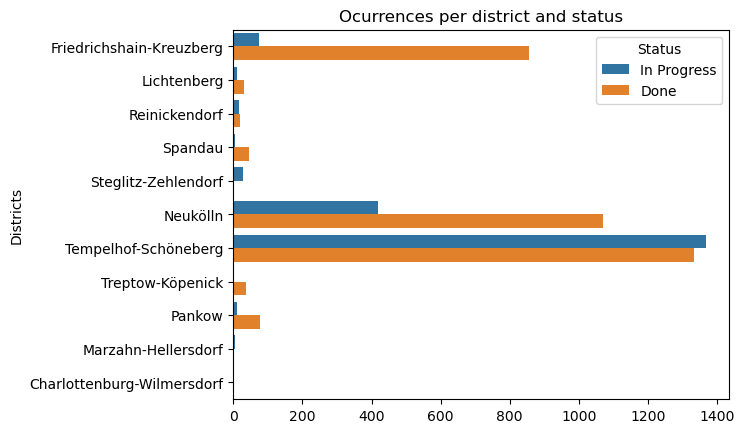

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['Friedrichshain-Kreuzberg', 'Lichtenberg', 'Reinickendorf',
       'Spandau', 'Steglitz-Zehlendorf', 'Neukölln',
       'Tempelhof-Schöneberg', 'Treptow-Köpenick', 'Pankow',
       'Marzahn-Hellersdorf', 'Charlottenburg-Wilmersdorf']

fig, ax = plt.subplots()
# ax = sns.countplot(x="bezirk", hue="status", data=df)
ax = sns.countplot(y ='bezirk', hue = "status", data = df)

ax.set(ylabel='Districts', xlabel='', title='Ocurrences per district and status')
ax.legend(title='Status', loc='upper right', labels=['In Progress', 'Done'])




In [80]:
# checking proportion
df['betreff'].value_counts(normalize=True)*100

Sperrmüll abgelagert                                                                      11.316568
Abfall - Müllablagerung                                                                   10.835799
Abfall - Sperrmüll                                                                         9.948225
Müllablagerung                                                                             6.286982
Abfall - Schrottfahrräder                                                                  4.789201
Abfall - Sonstiges                                                                         4.363905
Bauabfälle abgelagert                                                                      4.160503
Abfall - Bauabfälle, Bauschutt                                                             3.957101
Elektroschrott abgelagert                                                                  3.846154
Straßenaufsicht - Straßen- und Gehwegschäden                                               3.383876


In [81]:
# checking proportion
# df['erstellungsDatum'].value_counts(normalize=True)*100 

In [82]:
# checking proportion
df['sachverhalt'].value_counts(normalize=True)*100

Einkaufswagen                                                                                                                                    1.002227
Einkaufswagen                                                                                                                                    0.816630
Matratze                                                                                                                                         0.742390
Sperrmüll                                                                                                                                        0.723831
Müll                                                                                                                                             0.668151
                                                                                                                                                   ...   
Fußgängerweg blockiert, Gefahrenstelle, Stolper Gefahr.                     

In [83]:
# translate the headers
df_clean.rename(columns={'meldungsNummern': 'message_numbers', 
                   'bezirk': 'district', 
                   'betreff': 'subject', 
                   'erstellungsDatum': 'creation_date',  
                   'sachverhalt': 'item'}, inplace=True)

#'facts' = situation = item

In [84]:
# check how long is the dataframe
print(len(df_clean['subject'].values.tolist())) 

5408


## Check unique values and its proportion at columns

In [85]:
print(df_clean['subject'].unique())

['Sperrmüll abgelagert (Spiegel)'
 'Sperrmüll abgelagert (Holz-/Regalteile)'
 'Park- und Haltverbot nicht berücksichtigt' 'Parken auf Gehweg'
 'Abfall - Müllablagerung' 'Gehweg/Radweg zugeparkt'
 'Parkraumbewirtschaftung - Anwohner-, Gästevignetten'
 'Straßenaufsicht - Defekte Ampel' 'Parkraumbewirtschaftung - Sonstiges'
 'Grünanlage/Park - Grillen' 'Abfall - Sperrmüll'
 'Abfall - Bauabfälle, Bauschutt' 'Grünanlage/Park - Campieren, Zelten'
 'Lärm - Gaststätte'
 'Sondernutzung - Schankvorgärten (Tische und Stühle) KORI AND FAY'
 'Abfall - Sonstiges'
 'Parkraumbewirtschaftung - Ausnahme, Betriebsvignetten'
 'Straßenaufsicht - Wildwuchs von Privatgelände' 'Campieren'
 'Obdachlosenunterkunft'
 'Straßenverkehrsrechtliche Anordnungen - Verkehrszeichen'
 'Ladenöffnung - Sonn- und Feiertage' 'Sondernutzung - Abfallcontainer'
 'Straßenaufsicht - Sonstiges' 'Baustellen - Sonstiges'
 'Straßenaufsicht - Defekte Straßenbeleuchtung' 'Abfall - Bioabfälle'
 'Straßenverkehrsrechtliche Anordnungen - Ba

In [86]:
print(df_clean['status'].unique())

['In Bearbeitung' 'Erledigt']


In [87]:
print(df_clean['subject'].unique())

['Sperrmüll abgelagert (Spiegel)'
 'Sperrmüll abgelagert (Holz-/Regalteile)'
 'Park- und Haltverbot nicht berücksichtigt' 'Parken auf Gehweg'
 'Abfall - Müllablagerung' 'Gehweg/Radweg zugeparkt'
 'Parkraumbewirtschaftung - Anwohner-, Gästevignetten'
 'Straßenaufsicht - Defekte Ampel' 'Parkraumbewirtschaftung - Sonstiges'
 'Grünanlage/Park - Grillen' 'Abfall - Sperrmüll'
 'Abfall - Bauabfälle, Bauschutt' 'Grünanlage/Park - Campieren, Zelten'
 'Lärm - Gaststätte'
 'Sondernutzung - Schankvorgärten (Tische und Stühle) KORI AND FAY'
 'Abfall - Sonstiges'
 'Parkraumbewirtschaftung - Ausnahme, Betriebsvignetten'
 'Straßenaufsicht - Wildwuchs von Privatgelände' 'Campieren'
 'Obdachlosenunterkunft'
 'Straßenverkehrsrechtliche Anordnungen - Verkehrszeichen'
 'Ladenöffnung - Sonn- und Feiertage' 'Sondernutzung - Abfallcontainer'
 'Straßenaufsicht - Sonstiges' 'Baustellen - Sonstiges'
 'Straßenaufsicht - Defekte Straßenbeleuchtung' 'Abfall - Bioabfälle'
 'Straßenverkehrsrechtliche Anordnungen - Ba

In [88]:
print(df_clean['item'].unique())

['Spiegel' 'Holz-/Regalteile' 'Pkw in geschützter Grünanlage aufgefahren'
 ...
 'Ein Zelt nebst einigen Klamotten, Hausrat. etc. liegt im Gebüsch. Ist schon seit mehr als einem Jahr vorhanden. das Zelt ist kaputt, wird nicht benutzt.'
 'Glasmüll und Plastikmüll neben Glascontainern' 'Zwei Flachbildfernseher']


In [89]:
df_clean

,id,message_numbers,district,subject,creation_date,status,item
0,527563,['ljf29'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert (Spiegel),18.01.2017 - 15:01:09,In Bearbeitung,Spiegel
1,527575,['51cx6p'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert (Holz-/Regalteile),18.01.2017 - 15:05:54,In Bearbeitung,Holz-/Regalteile
2,622944,['vf943l'],Lichtenberg,Park- und Haltverbot nicht berücksichtigt,11.04.2017 - 14:31:38,In Bearbeitung,Pkw in geschützter Grünanlage aufgefahren
3,681533,['pkyi2p'],Lichtenberg,Parken auf Gehweg,25.06.2017 - 13:09:47,In Bearbeitung,NaN
4,788708,['9axrlt'],Lichtenberg,Abfall - Müllablagerung,27.10.2017 - 12:30:24,In Bearbeitung,Bauschutt
...,...,...,...,...,...,...,...
5403,4332959,['h1j475'],Friedrichshain-Kreuzberg,Abfall - Müllablagerung,27.02.2023 - 18:15:00,Erledigt,Jede Menge Altkleider die seit Wochen nass und...
5404,4332991,['451zwh'],Friedrichshain-Kreuzberg,Abfall - Sperrmüll,27.02.2023 - 19:18:26,Erledigt,BSR: 2 Sessel #27022023
5405,4332976,['lmcf0h'],Friedrichshain-Kreuzberg,Abfall - Sonstiges,27.02.2023 - 19:32:33,Erledigt,"Ein Zelt nebst einigen Klamotten, Hausrat. etc..."
5406,4332954,['rq3hfl'],Friedrichshain-Kreuzberg,Abfall - Müllablagerung,27.02.2023 - 19:46:26,Erledigt,Glasmüll und Plastikmüll neben Glascontainern


In [90]:
# convert id series to string
df_clean['id'] = df_clean['id'].apply(str)
df_clean


,id,message_numbers,district,subject,creation_date,status,item
0,527563,['ljf29'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert (Spiegel),18.01.2017 - 15:01:09,In Bearbeitung,Spiegel
1,527575,['51cx6p'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert (Holz-/Regalteile),18.01.2017 - 15:05:54,In Bearbeitung,Holz-/Regalteile
2,622944,['vf943l'],Lichtenberg,Park- und Haltverbot nicht berücksichtigt,11.04.2017 - 14:31:38,In Bearbeitung,Pkw in geschützter Grünanlage aufgefahren
3,681533,['pkyi2p'],Lichtenberg,Parken auf Gehweg,25.06.2017 - 13:09:47,In Bearbeitung,NaN
4,788708,['9axrlt'],Lichtenberg,Abfall - Müllablagerung,27.10.2017 - 12:30:24,In Bearbeitung,Bauschutt
...,...,...,...,...,...,...,...
5403,4332959,['h1j475'],Friedrichshain-Kreuzberg,Abfall - Müllablagerung,27.02.2023 - 18:15:00,Erledigt,Jede Menge Altkleider die seit Wochen nass und...
5404,4332991,['451zwh'],Friedrichshain-Kreuzberg,Abfall - Sperrmüll,27.02.2023 - 19:18:26,Erledigt,BSR: 2 Sessel #27022023
5405,4332976,['lmcf0h'],Friedrichshain-Kreuzberg,Abfall - Sonstiges,27.02.2023 - 19:32:33,Erledigt,"Ein Zelt nebst einigen Klamotten, Hausrat. etc..."
5406,4332954,['rq3hfl'],Friedrichshain-Kreuzberg,Abfall - Müllablagerung,27.02.2023 - 19:46:26,Erledigt,Glasmüll und Plastikmüll neben Glascontainern


In [91]:
# # clean subject column keeping only the subject and removing items
# df_clean['subject'] = df_clean['subject'].replace('Sperrmüll abgelagert (Holz-/Regalteile)', 'Sperrmüll abgelagert')
# df_clean['subject'] = df_clean['subject'].replace('Sperrmüll abgelagert (Spiegel)', 'Sperrmüll abgelagert')


In [92]:
df_clean

,id,message_numbers,district,subject,creation_date,status,item
0,527563,['ljf29'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert (Spiegel),18.01.2017 - 15:01:09,In Bearbeitung,Spiegel
1,527575,['51cx6p'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert (Holz-/Regalteile),18.01.2017 - 15:05:54,In Bearbeitung,Holz-/Regalteile
2,622944,['vf943l'],Lichtenberg,Park- und Haltverbot nicht berücksichtigt,11.04.2017 - 14:31:38,In Bearbeitung,Pkw in geschützter Grünanlage aufgefahren
3,681533,['pkyi2p'],Lichtenberg,Parken auf Gehweg,25.06.2017 - 13:09:47,In Bearbeitung,NaN
4,788708,['9axrlt'],Lichtenberg,Abfall - Müllablagerung,27.10.2017 - 12:30:24,In Bearbeitung,Bauschutt
...,...,...,...,...,...,...,...
5403,4332959,['h1j475'],Friedrichshain-Kreuzberg,Abfall - Müllablagerung,27.02.2023 - 18:15:00,Erledigt,Jede Menge Altkleider die seit Wochen nass und...
5404,4332991,['451zwh'],Friedrichshain-Kreuzberg,Abfall - Sperrmüll,27.02.2023 - 19:18:26,Erledigt,BSR: 2 Sessel #27022023
5405,4332976,['lmcf0h'],Friedrichshain-Kreuzberg,Abfall - Sonstiges,27.02.2023 - 19:32:33,Erledigt,"Ein Zelt nebst einigen Klamotten, Hausrat. etc..."
5406,4332954,['rq3hfl'],Friedrichshain-Kreuzberg,Abfall - Müllablagerung,27.02.2023 - 19:46:26,Erledigt,Glasmüll und Plastikmüll neben Glascontainern


In [93]:
# check uniques
print('id: ', len(df_clean.id.unique().tolist()))  # len(df_clean.id.unique())
print('message_numbers: ', len(df_clean.message_numbers.unique().tolist()))
print('district: ', len(df_clean.district.unique().tolist()))
print('subject: ', len(df_clean.subject.unique().tolist()))
print('creation_date: ', len(df_clean.creation_date.unique().tolist()))
print('status: ', len(df_clean.status.unique().tolist()))

id:  5408
message_numbers:  5359
district:  11
subject:  364
creation_date:  5338
status:  2


## Grouped by id
reference: https://sparkbyexamples.com/pandas/pandas-groupby-explained-with-examples/

In [94]:
df_groupedSubjectDistrict = df_clean.groupby(['subject', 'district']).sum().reset_index()
df_groupedSubjectDistrict

,subject,district,id,message_numbers,creation_date,status,item
0,13 Abfall - Schrottfahrräder,Friedrichshain-Kreuzberg,4256783,['dvht6p'],26.01.2023 - 10:53:54,Erledigt,\nIm Bereich des U-Bahnhofs Kochstraße befinde...
1,Abfall - Autoreifen,Tempelhof-Schöneberg,3735929,['kninep'],11.07.2022 - 14:51:29,In Bearbeitung,Autoreifen
2,Abfall - Autowrack,Spandau,4329709,['3l8fep'],25.02.2023 - 17:42:19,Erledigt,Das Auto steht bereits seit vielen Wochen zuge...
3,Abfall - Autowrack,Tempelhof-Schöneberg,3391854340414434577003458140347208834721653618...,['yusg01']['eebev5']['917aip']['y1fp4x']['s947...,15.03.2022 - 16:45:3819.03.2022 - 19:08:1109.0...,ErledigtErledigtErledigtErledigtErledigtErledi...,Auto steht seit einigen Wochen (Monaten?) an d...
4,Abfall - Autowrack ?,Tempelhof-Schöneberg,4301821,['grkef5'],15.02.2023 - 17:23:28,In Bearbeitung,"Im Wendekreis des Upstallweg, vor Hausnummer 9..."
...,...,...,...,...,...,...,...
512,taxishaltestelle,Tempelhof-Schöneberg,4311537,['rcrytd'],17.02.2023 - 21:55:50,Erledigt,Das ist eine taxishaltestelle. Aber wir können...
513,unerlaubte bestuhlung,Tempelhof-Schöneberg,3506407,['eqxqf5'],30.04.2022 - 20:34:22,Erledigt,Man kommt kaum an den Tischen und Stühlen vorb...
514,veraltete Beschilderung,Tempelhof-Schöneberg,4305066,['doocg1'],16.02.2023 - 14:14:04,In Bearbeitung,Schilder sind veraltet ( Datum 09.12.22)
515,wanderndes absolutes Halterverbotsschild,Tempelhof-Schöneberg,3957222,['kygw1'],02.10.2022 - 18:28:54,In Bearbeitung,"Luckeweg 24-26 befindet sich ein Baustelle, da..."


### Clean subject column keeping only "Sperrmüll abgelagert"

In [95]:
# drops the columns that has not Sperrmüll abgelagert in the subject column   
df_clean = df_clean[(df_clean.subject.str.startswith('Sperrmüll abgelagert'))].reset_index()
df_clean.head(55)


,index,id,message_numbers,district,subject,creation_date,status,item
0,0,527563,['ljf29'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert (Spiegel),18.01.2017 - 15:01:09,In Bearbeitung,Spiegel
1,1,527575,['51cx6p'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert (Holz-/Regalteile),18.01.2017 - 15:05:54,In Bearbeitung,Holz-/Regalteile
2,59,1804983,['b6pfcx'],Neukölln,Sperrmüll abgelagert,06.05.2020 - 10:50:02,In Bearbeitung,Sperrmüll
3,69,1952905,['2a1t6p'],Neukölln,Sperrmüll abgelagert,20.08.2020 - 09:06:18,In Bearbeitung,Sperrmüll
4,82,2059167,['rw035t'],Neukölln,Sperrmüll abgelagert,04.11.2020 - 08:02:10,In Bearbeitung,"Sehr geehrtes Team,\n\nauf der Gradestraße, zw..."
5,95,2346871,"['ciuznl', 'ubujnl', 'wi1r7l', 'xm04qp']",Neukölln,Sperrmüll abgelagert,07.03.2021 - 08:20:06,In Bearbeitung,Sperrmüll
6,204,3479272,"['3w8ht', 'ghadxd', 'tgdm9t']",Neukölln,Sperrmüll abgelagert,20.04.2022 - 13:04:40,In Bearbeitung,Defekter Rollcolli?
7,336,3618019,['s7r28w'],Neukölln,Sperrmüll abgelagert,27.05.2022 - 13:46:22,In Bearbeitung,NaN
8,337,3618022,['s7r28w'],Neukölln,Sperrmüll abgelagert,27.05.2022 - 13:46:22,In Bearbeitung,NaN
9,338,3618025,['s7r28w'],Neukölln,Sperrmüll abgelagert,27.05.2022 - 13:46:22,In Bearbeitung,zwischen Neuhofer Straße und Lockenhuhnweg - i...


In [96]:
print('subject: ', len(df_clean.subject.unique().tolist()))

subject:  3


In [97]:
# clean subject column keeping only the subject and removing items
df_clean['subject'] = df_clean['subject'].replace('Sperrmüll abgelagert (Holz-/Regalteile)', 'Sperrmüll abgelagert')
df_clean['subject'] = df_clean['subject'].replace('Sperrmüll abgelagert (Spiegel)', 'Sperrmüll abgelagert')

In [98]:
print('subject: ', len(df_clean.subject.unique().tolist()))

subject:  1


### Break the column item in 12 parts and translate
The translation of each block is made in Google translate.

In [99]:
# df_clean['old_index'] = df_clean['index']
item_p1 =  df_clean['item'][:51]
item_p2 =  df_clean['item'][51:101]
item_p3 =  df_clean['item'][101:201]
item_p4 =  df_clean['item'][201:251]
item_p5 =  df_clean['item'][251:301]
item_p6 =  df_clean['item'][301:351]
item_p7 =  df_clean['item'][351:401]
item_p8 =  df_clean['item'][401:451]
item_p9 =  df_clean['item'][451:501]
item_p10 =  df_clean['item'][501:551]
item_p11 =  df_clean['item'][551:601]
item_p12 =  df_clean['item'][601:]

# test
for row in item_p1:
        print(row)

Spiegel
Holz-/Regalteile
Sperrmüll
Sperrmüll
Sehr geehrtes Team,

auf der Gradestraße, zwischen Höhe Hornbach und der Gottlieb-Dunkel-Straße in Richtung Schöneberg befindet sich im Moment extrem viel Müll und Abfall bis in den Radweg hinein. Ich fahre diese Strecke seit über 10 Jahren mit dem Rad und stelle fest, dass der Müll immer mehr wird. Meistens gab es viel Müll um die Glascontainer herum, aber nun ist unter jedem Baum ein Müllhaufen entstanden. Es blutet mir das Herz. Aber auch mir fallen keine Möglichkeiten ein, wie man diesem Problem entgegen treten kann. (vielleicht Wildtierkameras?)

Mit freundlichen Grüßen
Sperrmüll
Defekter Rollcolli? 
nan
nan
zwischen Neuhofer Straße und Lockenhuhnweg - insbesondere ggü. 56
Müll müll müll
Platten,Holz
Möbel und Paletten; 1 schwarzer Sack
Müll, Sperrmüll 
Auf dem Gehweg gegenüber der Hausnummer 57
Es werden immer mehr kaputte Stühle und Tische 
Blaue Säcke, Bauabfälle
Diverse Müllhalden auf dem Columbiadamm 
Sperrmüll
wöchentliche Regelme

In [100]:
item_p1_eng = '''
Mirror
wood/shelf parts
bulky waste
bulky waste
Very dear team,

On Gradestraße, between the heights of Hornbach and Gottlieb-Dunkel-Straße in the direction of Schöneberg, there is currently a great deal of rubbish and rubbish right into the cycle path. I've been cycling this route for over 10 years and I've noticed that the garbage keeps increasing. Most of the time there was a lot of rubbish around the glass containers, but now there is a pile of rubbish under every tree. My heart is bleeding. But I can't think of any way to counteract this problem. (maybe wildlife cams?)

Best regards
bulky waste
Broken roll colli?
well
well
between Neuhofer Straße and Lockenhuhnweg - especially opposite. 56
garbage garbage garbage
panels, wood
furniture and pallets; 1 black sack
rubbish, bulky waste
On the sidewalk opposite house number 57
There are more and more broken chairs and tables
Blue bags, construction waste
Various garbage dumps on the Columbiadamm
bulky waste
weekly rule message
Parasite tenants in Berlin are active again - unfortunately.
Bodenholz parts are lying on the former cycle path see photo
Rubble, household waste, wood, cardboard, folding bed
Sheetrock, electronic scrap, buckets of paint, bulky waste
Ancient, filthy prams
Carcinogenic substances next to the playground. Please install lighting on Nernstweg. Then maybe the nocturnal garbage dumping will finally stop. And then maybe the drug trade won't be done there anymore. The Nernstweg has degenerated into a dump. At night, many people don't dare go there anymore. Please help us!
Bulky waste was dumped on two trees on Columbiadamm near the Rixdorfer Teich.
Big pack mi municipal waste shopping trolley
furniture, rubbish bag,
garbage of all kinds
Plastic, fabric upholstery, bar stools, wooden parts
A bed was dumped illegally
DON'T DONE YOUR HAINIS!!!!

DAILY UPDATE PHOTO 4.11. reported for 4!!!!WEEKS

DO YOUR JOB!!!!

look here

old message, same shit


Message "Bulky waste dumped"

WHAT?
"bulky waste dumped"

Couch, armchair, dirt


WHERE?
+
−
Leaflet
Karl-Marx-Platz 15
12043 Neukölln
Street next to Dixie toilet


STATUS INFORMATION
Status: Done
Report date: 10/11/2022 - 5:46 p.m

Message number: hctedd, kc3669

Status: Done (03.11.2022 - 06:44)


FEEDBACK FROM THE Ordnungsamt Neukölln
Thank you for your reference.

The disruption was forwarded to the Berlin city cleaning department on October 12, 2022 for processing.

The Berlin city cleaning department informed us on November 3rd, 2022 that the matter had been settled.

DON'T DONE YOUR HAINIS!!!!
MATTRESSES, CLOTHES, BOARDS
Garbage
various bulky waste
Ladies and Gentlemen

For at least five weeks, bulky waste and other rubbish has been piling up again on the cycle path and footpath on Gradestraße from around house number 60 to almost the allotment garden in front of the Gradestraße bridge, especially in the area of the glass containers. Some of the cycle path is now no longer passable. I would like to ask you to remedy this. Why do complaints and information from citizens always have to be made first? The public order office drives vehicles along this route regularly and the topic of the garbage that is disposed of there particularly often should be well known. This is annoying. Maybe video cameras should be installed there to catch the illegal disposal companies. I can bet that if the rubbish was in the lanes of the cars, it would be gone in no time. I am curious to see how long it will take to remove the rubbish from the bike/footpath this time.

Best regards

Ines Paessler
Bulky waste in the green strip, unfortunately something new is always added :/
Old mattress wood
Illegal dumping of bulky waste
bulky waste
Extreme littering of the green strip and the street corners along the sidewalk coming from Karl-Marx-Strasse. Sidewalk is currently impassable. Since there are two day care centers in the street, children and parents are sometimes forced to walk on the road to avoid the rubbish.
bulky waste
Euro pallet, rubbish bags
various couches
Two-piece bedstead has been discarded
mattresses
furniture parts (kitchen)
Patio doors with glazing
mattress
bulky waste
'''

In [101]:
for row in item_p2:
        print(row)

Müll, Sperrmüll
Unter Fußgängerbrücke und an der Auffahrt zur Stadtautobahn: Sperrmüll, Sofas, Tische, Abfall
Holzbretter.
nan
leere Farbeimer
Couch 
Zusätzlich zu den großen Mengen Müll auf dem Parkplatz unter der Brücke haben sich große Mengen Sperrmüll an der Böschung gesammelt, unter anderem ein großes Sofa. 
Alter sehr schwerer Tresor, daneben Müllablagerung
Autoteil
Matratze ca. 1,20 m x 1,40 m
Holz 
Holz 
3 Fensterrahmen
Sperrmüll
kaputte Autofrontscheibe
div. Müllablagerungen auf Gehweg 
Direkt vor meinem Grundstück wurde auf dem Grünstreifen eine vermutlich defekte Lampe entsorgt. 
Matratze
Auf dem Gehweg 
Bretter und diverse andere Tüten die tgl. Dazu kommen. 
Seit 4 Tagen Müll abgelagert 
 Matratze liegt Vorschule
Es steht ein weißer Schreibtisch auf dem Gehweg

Kaputter Rolladen einfach auf Gehweg, Stolper Gefahr 
Holzbretter
Latten 
Latten 
Sperrmüll
2x Stühle
Hausrat
Auf dem Fahrradweg liegt ein Bürostuhl sowie ein, und der Müll ist verteilt und ein Holzbrett siehe Foto 


In [102]:
item_p2_eng = '''
rubbish, bulky waste
Under the pedestrian bridge and at the entrance to the city motorway: bulky waste, sofas, tables, rubbish
wooden boards.
well
empty paint buckets
couch
In addition to the large amounts of rubbish in the parking lot under the bridge, large amounts of bulky waste have accumulated on the embankment, including a large sofa.
Old, very heavy safe, rubbish dump next to it
car part
Mattress approx. 1.20 m x 1.40 m
Wood
Wood
3 window frames
bulky waste
broken car windshield
various garbage deposits on sidewalk
A presumably defective lamp was disposed of directly in front of my property on the green strip.
mattress
On the pavement
Boards and various other bags that are added daily.
Garbage dumped for 4 days
  Mattress lies preschool
There's a white desk on the sidewalk

Broken roller shutters simply on the sidewalk, risk of tripping
wooden boards
slats
slats
bulky waste
2x chairs
household items
There is an office chair and one on the cycle path, and the garbage has been distributed and a wooden board see photo
1 armchair
1 large mattress
various approx. 3 m³
Mattress dumped on the street.

Mattress leaning against a fence
The mattress is constantly thrown on the bank by the market operators and then somehow ends up back on the sidewalk
Garbage
mattress
mattress
Wardrobe
div. pieces of furniture
garbage disposal
garbage disposal
Become aware of the sweeping citizen action
a board
See photos
and towards Siegfried
so
1 inventory, plastic bag,, stroller. 5 shopping carts
shopping cart and pallet
'''

In [103]:
for row in item_p3:
        print(row)

Die riesige Matratze, die ich bereits mehrfach gemeldet habe und die Sie angeblich abgeholt haben!
Müllablagerung 
Schrank und Kartons 
Koffer 
1 Sessel
Um den großen Container herum liegt ständig Müll
Arbeitsplatte 
Tür,  Bretter 
Siehe Foto 
Tief/Kühlschrank-Kombi, Einkaufswagen, wechselndes Erscheinungsbild der Müllablage
Kühlschrank, Einkaufswagen, Regale, CD-Ständer, Drehtisch 
Alte Matratze und Müll.
Schrankbetten kartons
2 Matratzen liegen auf dem Gehweg zwischen den Haustüren 2 und 3 der Mahlower Straße.
Matratze, zerlegte Möbel, Bauschutt und Hausmüll
hier und ggü bis Kranoldplatz muss aufgeräumt werden
Sperrmüll
Sperrmüll
Müll
Stuhl, Holzlatten
Holz 
Matratze

Metalle am Straßenrand 
Sperrmüll 
Diverser Sperrmüll auf Gehweg abgelagert
Holzteile
Bretter und Schrankteile 
Sehr geehrte Damen und Herren,seit Wochen steht ein weißer Plastikcontainerschrank vor unserer Haustüre, in der Fuldastrasse 34 in Neukölln. Wir Nachbarn haben den Baum eingefriedet und Blumen angepflanzt. Ebe

In [104]:
item_p3_eng = '''
The huge mattress which I have reported on numerous occasions and which you claim to have picked up!
garbage disposal
closet and boxes
Suitcase
1 armchair
There is always rubbish around the large container
countertop
door, boards
See photo
Combination freezer/fridge, shopping trolley, changing appearance of the waste bin
Fridge, shopping cart, shelves, CD rack, turntable
Old mattress and garbage.
Wall beds boxes
2 mattresses are on the sidewalk between doors 2 and 3 on Mahlower Strasse.
Mattress, disassembled furniture, rubble and household waste
here and opposite to Kranoldplatz must be cleaned up
bulky waste
bulky waste
Garbage
chair, wooden slats
Wood
mattress

roadside metals
bulky waste
Various bulky waste dumped on sidewalk
wooden parts
boards and cabinet parts
Dear Sir or Madam, For weeks now, a white plastic container cabinet has been standing in front of our front door at Fuldastrasse 34 in Neukölln. We neighbors fenced in the tree and planted flowers. I just pulled out parts of the broken closet. Please arrange for BSR to pick up the broken cupboard.
bulky waste
mattress
cupboard parts, mattress
Broken chair and carpet
2 scaffolding planks
chair + wooden board
laminate/parquet
1 tub support each
1 bed with storage box
1 wooden dresser
1 table with glass top
various cabinet parts
1 sofa
1 couch + 1 mattress
Unfortunately again bulky waste on our doorstep
Bulky waste and old clothes
bulky waste
A container stood here for a relatively long time during a construction site, which then produced a good deal of "bycatch". The container has now been removed. And a large heap of bulky waste is left over and continues to generate "bycatch".
mattress
On the pavement
On the pavement
On the sidewalk at the traffic sign
Chair
Garbage, scrap, construction closures have been lying on the sidewalk for several weeks. Please clean!
couch
Garbage
Floor covering boards
Also at the waste glass container to the right of the above address
Garbage
1 mattress
closet part
jewelry suitcase
An old coffee table and chipboard were placed here.
well
mattress
couch part
mirror cabinet
2 mattresses
1 small closet 1 small mattress
partly from the restaurant renovation
Old cupboards dumped, more rubbish further to the right
bulky waste
Laminate parked on the house wall

wooden slats
Mattress.
couch, boards.
mattress
umbrella stand
Carpet
1 large mattress
Chair
furniture scraps and rubbish
mattress
Various bulky waste
Wood
Long piece of wood
At the fence garbage deposit in a length of about 15 meters, there the garbage is distributed see photo
various window panes, small cars
1 sofa
4 chairs
bulky waste
mattress
Small cabinet
Wardrobe
There is bulky waste on the sidewalk.
shelf
mattress
wooden board
Suitcase
10 wardrobe boards 1 large mattress
closet part
2 glass plates

Table chair
And again a mattress.. closet
Bulky waste, 3 chairs, 2 small cupboards, coffee table, corner sofa, (large)
'''

In [105]:
for row in item_p4:
        print(row)

Möbelteile
Diverse Müllablagerungen, Matratze, Sessel, Pappkarton, Restmüll.
leere Eimer, diverser Sperrmüll
Möbelteil
Holz, Teppich
Spanplatten auf Gehweg,
2 Matratzen
2 Matratzen 
Couch mehrere Matratzen 
Sperrmüll
Kinderwagen und Kram 
Achtung die plane auf dem Klostuhl ist voller Müll 
2x Koffer
Kiste
Seit Monaten liegt gegenüber der Neuhofer Straße. 28 am Eingang in die Wohnsiedlung eine Matratze und in diese eingewickelt eine Pressspanplatte.
Folien Spiegel Topf 
Holzlatten 
Großflächig Müll rund um die Glascontainer/ Sperrmüll/Müllsäcke 
Bretter, Leisten, Müllsäcke
Sperrmüll

leider bis Rixdorf durch, man kann jetzt nicht 20 Einzelmeldungen machen wenn die Reinigung versagt
Stühle
Plastikstuhl
Teppich, Lattenrost
Nachdem ich am 25.01. bereits die Ablagerung des abgeschlossenen Zugwagens gemeldet hatte (ch4e0x - diese finde ich leider online allerdings nicht mehr) hat sich nun erst eine Couch und dann noch eine Matratze zu dem Müll dazu gefunden. Bitte entsorgen Sie dies schnell,

In [106]:
item_p4_eng = '''
furniture parts
Various rubbish deposits, mattress, armchair, cardboard box, residual waste.
empty buckets, various bulky waste
furniture part
wood, carpet
chipboard on sidewalk,
2 mattresses
2 mattresses
Couch several mattresses
bulky waste
prams and stuff
Attention the tarpaulin on the toilet seat is full of rubbish
2x suitcases
Box
For months has been opposite Neuhofer Strasse. 28 a mattress at the entrance to the housing estate and a chipboard wrapped in it.
Foil mirror pot
wooden slats
Large areas of rubbish around the glass containers/bulky waste/garbage bags
Boards, strips, garbage bags
bulky waste

unfortunately through to Rixdorf, you can't make 20 individual reports now if the cleaning fails
chairs
plastic chair
carpet, slatted frame
After I on 25.01. had already reported the dumping of the locked train carriage (ch4e0x - unfortunately I can't find this online anymore) has now found first a couch and then a mattress to go with the rubbish. Please dispose of this quickly or this street will become a complete landfill again. Thank you very much!
See photos
Bulky waste for a good week in front of the house
There's a lounge chair on the sidewalk.
window frame and countertop
A yellow round ball-shaped armchair or beanbag
mattress
An old office chair has been on the street for about 2 months; it was previously in the pedestrian area and is now on the other side of the street under a tree opposite number 37.
Furniture
chair & bulky waste.
bulky waste.
couch, mattress
Mattress leaning against tree
couch set

Karl-Marx-Str. 189
bulky waste
Karl-Marx-Str. 195
bulky waste
Grenzallee 97
bulky waste
Grenzallee 71
bulky waste
carpets etc
A stroller was parked illegally
Closet was illegally cleared
furniture deposit
mirrors, boards
Illegal bulky waste
furniture etc
A lot of bulky waste and rubbish deposits in front of the former Hoffmann's construction site
Someone has disposed of their kitchen
'''

In [107]:
for row in item_p5:
        print(row)

Holztisch 
Matratze 
Berge
ggü Matratze
In der Silbersteinstr. 128 und 138 liegt Sperrmüll und Elektroschrott 
Matratze
Holzplatte
Sperrmüll 
2 Holzteile
Holzteile
Schrankregal.
Sofa 
Sperrmüll wurde am dortigen baum abgelagert
Sessel und Matratze wurden illegal abgelagert
Böhmische Str. 31
Speermüll
Hertzbergstr. 2
Sperrmüll
Niemetzstr. 15
Sperrmüll
Thiemannstr. 16
Sperrmüll
2x Schublade
Am Stromkasten liegt Sperrmüll 
Tür von geschrierschrank, Tischplatte
Matratze
Ein schwarzes Sofa
Regal und Stuhl, liegt schon länger 
Kiste
Einkaufswagen, & Matratze.
Siehe Foto 
Auf dem Bürgersteig steht diverses Gerümpel.
Couch, Lampe


Müll 
Sofaelemente, Matratze und Stühle 
Schaumstoffmatratzen
2 Matratzen
ein Sofa wurde illegal abgelagert
zwei Sofas wurden illegal  abgestellt
Matratze,Wäscheständ


er
Siehe Fotos 
diverser Müll und Sperrmüll wurde illegal abgelegt.
eine Matratze wurde illegal abgelegt
es besteht Verletzungsgefahr durch einen illegal abgestellten Spiegel, Glasbruch vor der Hausn

In [108]:
item_p5_eng = '''
wooden table
mattress
Mountains
versus mattress
In the Silbersteinstr. 128 and 138 is bulky waste and electronic waste
mattress
wooden board
bulky waste
2 wooden parts
wooden parts
closet shelf.
sofa
Bulky waste was deposited on the tree there
Armchair and mattress were dumped illegally
Bohemian Street 31
spear trash
Hertzbergstr. 2
bulky waste
Niemetzstr. 15
bulky waste
Thiemannstr. 16
bulky waste
2x drawer
There is bulky waste at the power box
Wardrobe door, table top
mattress
A black sofa
Shelf and chair have been lying around for a long time
Box
shopping cart, & mattress.
See photo
There is a lot of junk on the sidewalk.
couch, lamp


Garbage
Sofa elements, mattress and chairs
foam mattresses
2 mattresses
a sofa was dumped illegally
two sofas were parked illegally
mattress, drying rack


he
See photos
Various rubbish and bulky waste was dumped illegally.
a mattress was illegally discarded
there is a risk of injury from an illegally parked mirror, broken glass in front of house number 11
Mattresses, sofa, rubbish
furniture leftovers
Bucket
furniture leftovers
pad
Old furniture was illegally disposed of yesterday at 9:45 p.m.
I hereby report an accumulation of rubbish at Marienfelder Chaussee 1 on the parking strip opposite Penny, Berlin - Buckow, with the request that it be picked up quickly before more bulky waste is dumped there. See pictures

Thanks in advance.

mattress
wooden parts
mattress
Carpet
'''

In [109]:
for row in item_p6:
        print(row)

Holzteile, Hausmüll Stuhl
Müll 
Bretter.( Sperrmüll.)
Müllhaufen, alles mögliche. Liegt mehrere Monate und wächst täglich.
Ein Sofa wurde illegal abgelegt
Schrank 
Eine Matratze wurde illegal abgelegt
Eine Matratze wurde illegal abgelegt
Schaumstoff 
Schrank
Möbel
Sofateil
Möbel, Holz
Matratze seit  9.2
drei Sofas an der Straße
Kabeltrommel und Tannenbaum 
Matratzen u Müllsäcke 
2 Sofas 
Tisch, Stuhl
Regal, Sofa, Tisch
diverser Sperrmüll
Bettgestell
Ausrangiertes Sofa
Matratze
Stühle regalteile 
Stuhl 
Sperrmüll 
Holzmöbelteile
Sofa auf Gehweg
Schrankteile 
Schreibtisch 
Bett Teil 
Möbelteil 
Möbelstück
Bretter
Möbelteil
EU-Palette
Sperrmüll am Straßenrand und Baum abgelagert
Eine riesige weiße Platte 
Schrank 
Matratze, Küchenmöbel, Müll, Weihnachtsbaum
Matratze 
Regalbretter abgelagert 
Matratze und Holzlatten
Teppich
Matratze
Sperrmüll behindert den Gehweg/Übergang 
1 Teppich 1 Koffer 
Holzbretter und Stroh
Büromöbel


In [110]:
item_p6_eng = '''
Wooden parts, household chair
Garbage
boards.( bulky waste.)
heaps of rubbish, all sorts of things. Lies for several months and grows daily.
A sofa was illegally discarded
Wardrobe
A mattress was illegally discarded
A mattress was illegally discarded
foam
Wardrobe
Furniture
sofa part
furniture, wood
Mattress since 9.2
three sofas on the street
Cable reel and Christmas tree
mattresses and rubbish bags
2 sofas
Table chair
shelf, sofa, table
various bulky waste
bedstead
Discarded sofa
mattress
Chairs shelf parts
Chair
bulky waste
wooden furniture parts
sofa on sidewalk
closet parts
Desk
bed part
furniture part
furniture
boards
furniture part
EU pallet
Bulky waste dumped at the roadside and tree
A huge white slab
Wardrobe
Mattress, kitchen furniture, garbage, Christmas tree
mattress
Shelves discarded
Mattress and wooden slats
Carpet
mattress
Bulky waste obstructs the sidewalk/crossing
1 carpet 1 suitcase
wooden boards and straw
office furniture
'''

In [111]:
for row in item_p7:
        print(row)

Sperrmüll hinter Schaltkastem 
Kleiner Badschrank und 6 Schrankbretter 
Matratzen und Lattenrost
Einkaufswagen, Matratze (bereits mehrfach und über Monate angezeigt)
Schrank 
Müll 
Bügelbrett 
Schränke, Matratzen, Stühle etc.
Alte Bretter von Schuppentür
2 Matzen + 2 Lattentoste Bettteile
Es liegt ein großer Teppich hinter den Schienen in der Wutzkyallee und das seit Monaten.
Müll.
Eine  gr0ße  Matratze wurde illegal abgelegt
Gegenüber der Hausnummer 20 und 11 liegt Elektroschrott und Sperrmüll 
Glasscheibe
Alte Paletten und ein alter Kinderwagen
Alte Bretter
Alte Matratze
Holz oder Spanplatten. Liegt bereits seit Wochen dort. 
Wäschestaender
Matratze
Möbelteil
Styropor, Holz
Normaler Müll den ganzen Gehweg entlang und einzelne Sperrmüllhaufen
1 Sitzbank
1 Holzbohle
1 Matratze
1 Stuhl
Sitzteil
diverser Sperrmüll
Bettcouch
Bettkasten
Matratzen

Meldung zum 2. Mal
1 Rückenlehne Couch
+ Holzteil
1 Couch 
diverser Sperrmüll, Tiefkühlschränke, Fernseher etc.

Bitte vor Ort ansehen
Stuhl 
Sp

In [112]:
item_p7_eng = '''
Bulky waste behind control box
Small bathroom cabinet and 6 cabinet boards
Mattresses and slatted frame
Shopping cart, mattress (already displayed several times and for months)
Wardrobe
Garbage
Ironing board
cupboards, mattresses, chairs etc.
Old boards from shed door
2 mattresses + 2 slatted bed parts
There is a big carpet behind the rails in Wutzkyallee and has been for months.
Garbage.
A large mattress was illegally discarded
Opposite house numbers 20 and 11 is electronic waste and bulky waste
glass pane
Old pallets and an old stroller
old boards
old mattress
wood or chipboard. Has been there for weeks.
drying rack
mattress
furniture part
Styrofoam, wood
Normal rubbish all along the sidewalk and a few bulky rubbish heaps
1 bench
1 wooden plank
1 mattress
1 chair
seat part
various bulky waste
sofa bed
bed box
mattresses

Message for the 2nd time
1 backrest couch
+ wooden part
1 sofa
Various bulky waste, freezers, televisions, etc.

Please view on site
Chair
bulky waste
A container has been standing at the corner of Kienitzer Strasse and Oderstrasse for months. At first it was always closed, but now it's been open for weeks and everyone throws in their rubbish, including household rubbish. In the morning you can already see the rats running around there. Unfortunately we could not determine who is responsible for the container. But it's getting more garbage every day. Please take care that the container and the rubbish is removed from there
bulky waste
wood waste
bulky waste
remains of furniture
shelf
remains of furniture
closet parts
Wardrobe
1 stool
4 posts in the tree disc
A closet part
Furniture on the sidewalk / house wall
rods
Bulky waste must be disposed of urgently.
Two filthy mattresses and two new garbage bags were added
'''

In [113]:
for row in item_p8:
        print(row)

Stuhl

diverser Sperrmüll
Schreibtisch
Möbelteile: Tischplatten, Sessel, Couch, Schrankteile und 6 große Poren-Bausteine ca. 25x60cm 
Möbelteile und Unrat 
Möbelteile: Bettrahmen, Couchteile
1m3
Eine Matratze wurde illegal abgelegt
Eine Matratze wurde illegal abgelegt
Möbel wurden illegal abgelegt
Eine Matratze  wurde illegal abgelegt
Ein Sofa und sonstige Möbel wurden illegal abgelegt
Eine Matratze wurde illegal abgelegt
Eine Matratze wurde illegal abgelegt
Schrankteil 
Siehe Fotos 
Couch auf dem Gehweg
Sperrmüll auf dem Gehweg
Ich möchte hiermit eine große Verdreckung/Sperrmüll Ablage in Berlin Neukölln melden. Ich finde es sehr schade und traurig, dass unser Kiez mit dieser Aktion so verdreckt wird. Ich empfinde es auch als sehr störend. Vor einem Jahr wurde nämlich die ‚Harzer Ecke‘ eingeführt und seit dem wird es leider nur genutzt um privaten Sperrmüll abzugeben. Es ist andauernd verdreckt, durcheinander und sehr eklig anzuschauen.

Standort: Weigandufer/Treptower Straße

Stuhl 


In [114]:
item_p8_eng = '''
Chair

various bulky waste
Desk
Furniture parts: table tops, armchairs, couch, cupboard parts and 6 large pore building blocks approx. 25x60cm
furniture parts and rubbish
Furniture parts: bed frame, couch parts
1m3
A mattress was illegally discarded
A mattress was illegally discarded
Furniture was dumped illegally
A mattress was illegally discarded
A sofa and other furniture were illegally discarded
A mattress was illegally discarded
A mattress was illegally discarded
closet part
See photos
couch on the sidewalk
Bulky waste on the sidewalk
I would like to report a large amount of dirt/bulky waste in Berlin Neukölln. I think it's a pity and sad that our neighborhood is getting so dirty with this campaign. I also find it very annoying. The 'Harzer Ecke' was introduced a year ago and since then it has unfortunately only been used to drop off private bulky waste. It's constantly dirty, messy and very disgusting to look at.

Location: Weigandufer/Treptower Strasse

Chair
Metal parts and a wooden board lie on the grassy area next to the cycle path, see photo
chairs and chest of drawers
plastic chair cardboard

1 couch 2 seater
armchair, mattress
Small wooden cupboard is on the sidewalk see photo

There are wooden planks on the green strip next to the cycle path (see photo).
mattress/ carpet
mattress
1 mattress
Bulky waste, pieces of furniture, mattresses, clothing, etc. are next to glass counters
Foam mat green
see photo
Is the bsr also coming to Neukölln??? The streets and sidewalks look like the sow!!!
stroller
Opposite photo Klas
bulky waste
2 armchairs
couch
2-seater couch, closet part
bedstead
2 slatted frames
Ladies and Gentlemen
I would like to report illegal waste disposal.
Opposite the house Gutschmidtstr. 46, 12359 Berlin became a complete
Couch set disposed of in the park (in the bus loop).
dumped bulky waste
Pieces of wood and furniture lie next to glass counters
old mattress
stroller
furniture parts, cushions
Mattress on the tree right by the front door of number 10

Carpet rolls on go and bike path in front of the cemetery
'''

In [115]:
for row in item_p9:
        print(row)

Holzteile
Matratze 
Große Matraze 
Couch und Müllablagerungen
Sperrmüll
3 m Papprolle mit kl. Rest Linolium
Illegal gelagert Sperrmüll Bretter, Möbel, etc.
Matratze und Teppich am Baum , Beginn vom Spielplatz, illegal abgestellt
1 Kinderwagen + Schrankteil
Sperrmüll
Spanplatten
Regalgestell
1 Couch + 1 Sessel
Altes Lattenrost
Diverse Holzbretter liegen an der Baumscheibe.
Alte Arbeitsplatte
Es wurde Sperrmüll auf dem Gehweg entsorgt
Matratze
Matratze, Stühle, weiterer Müll
Wilde Mülldeponie, die hier bereits seit 2022 wächst. Wurde bereits mehrfach auf "erledigt" gesetzt, BSR kommt aber nicht.
Freundliche Grüße, besten Dank vorab
Schrankteil
Schrank
sofa
Alte Matratze abgelegt
Schaumstoffmatraze
Matratze  und Müll
Die Ederstraße ab Sonnenallee bis zur Baustelle ist eine Müllkippe. Es scheint, als ob ein Müllfahrzeug die Ladung verteilt hätte. 
Siehe Fotos 
und Müll
auch gegenüber im gesamten Abschnitt
und Müll
auch ggü und in der gesamten Straße
Schrankteile 
Holzmöbelteile
Alte Möbel 

In [116]:
item_p9_eng = '''
wooden parts
mattress
Big mattress
Couch and garbage dumps
bulky waste
3 m cardboard roll with small remainder linoleum
Illegally stored bulky waste boards, furniture, etc.
Mattress and carpet on the tree, beginning of the playground, parked illegally
1 stroller + closet part
bulky waste
chipboard
shelf rack
1 couch + 1 armchair
Old slatted frame
Various wooden boards lie on the tree disc.
Old countertop
Bulky waste was dumped on the sidewalk
mattress
Mattress, chairs, more rubbish
Wild garbage dump that has been growing here since 2022. Has already been set to "done" several times, but BSR does not come.
Kind regards, many thanks in advance
closet part
Wardrobe
sofa
Discarded old mattress
foam mattress
mattress and garbage
The Ederstraße from Sonnenallee to the construction site is a rubbish dump. It seems as if a garbage truck distributed the load.
See photos
and garbage
also opposite throughout the section
and garbage
also opposite and in the entire street
closet parts
wooden furniture parts
Old furniture
See photo
Mattresses, clothes in the gutter and in the bushes
closet and trash
Shelves and mattress dumped at the sidewalk and road
Illegal garbage disposal
furniture parts
Chair
drawer unit
The garbage is piling up, the mattress has been there for more than a month. Drug addicts use tools to force open the toilet door even when it is closed.
mattress
mattress again
sofa and mattress topper
2x carpet, plastic tree
Mattress and more in front of Cafe
Padded square (ottoman), on the street, in the hedge, folding table. In a bank alcove.
See photos
bulky waste
boards, wood.
old chair.
'''

In [117]:
for row in item_p10:
        print(row)

Guten Tag,
die Bäume vorm Haus werden mit Sperr- u.a. Müll am Erdreich bei den Wurzeln belegt
Sperrmüll
Sofa
Sperrmüll
Schrank, Boxen, Teppiche 
Schrank 
Viel Sperrmüll abgelegt worden 
Alte Regale wurden abgelegt und versperren die Bank
Couch und drucker
Stuhl ,klamotten
Leiter
Immer wieder. !!!! 
Heute Nacht so gegen 1:30 Uhr wurden Möbelstücke vor unserem Müllplatz hingeschmissen, leider konnte ich das Nummernschild nicht sehen, es war ein dunkler Transporter mit 2 Männern.
Am Mittwoch kommt immer die BSR, doch die kommen nun nicht mehr an die Tonnen ran.
Katzenkratzbaum, Autoreifen, Koffer und Mülltüten.
1 Kommode
Matratze
Schrott , Zaunteil 
1 sessel
Große Matratze „abgelegt“
Palette .. wurde schon vor langer Zeit gemeldet 
Kleine Arbeitsplatte und 2 kleine Schranktüren 
ein Sofa in 3 Teile und ein Reifen ohne Felge
Ein Schrank und ein Holzstuhl
Holzkiste mit Hausmüll, & Holztisch rund.
Koffer.
Matratze
Holz und ein Spiegelschrank
Schrankteile

Holz 
Schrankbetten
Holzmöbelteile
S

In [118]:
item_p10_eng = '''
Good day,
the trees in front of the house are covered with bulky waste and other rubbish on the ground at the roots
bulky waste
sofa
bulky waste
Closet, boxes, carpets
Wardrobe
A lot of bulky waste has been dumped
Old shelves have been discarded and are blocking the bank
couch and printer
chair, clothes
Director
Again and again. !!!!
Tonight around 1:30 a.m. pieces of furniture were thrown down in front of our rubbish dump, unfortunately I couldn't see the number plate, it was a dark van with 2 men.
The BSR always comes on Wednesdays, but they can't get to the bins anymore.
Cat scratching post, car tires, suitcases and garbage bags.
1 dresser
mattress
Scrap, fence part
1 armchair
Large mattress "discarded"
Palette .. was reported a long time ago
Small worktop and 2 small cupboard doors
a sofa in 3 parts and a tire without a rim
A cupboard and a wooden chair
Wooden box with household waste, & wooden table around.
Suitcase.
mattress
wood and a mirror cabinet
closet parts

Wood
Murphy beds
wooden furniture parts
Wardrobe
wooden furniture
foam
Boards, couch backrest, laundry basket.
Slatted frames, mattress.
A mattress has been lying in front of the telephone switch boxes for days.
various bulky waste
mattress
Old doctor's chair or similar? It accumulates more garbage :-(
Ladies and Gentlemen
I am currently renovating an apartment in Leinestr. 12. Illegal rubbish deposits that do not come from my home and for which I am not responsible keep accumulating next to the rubbish container. I would ask you to pick up these illegal dumps. Kind regards, Peter Kasten
There's a table on the sidewalk.
wooden boards
sorry You've already written twice that it's done. It would be nice... the beautiful piece has been here for 3 weeks! Terrible.
A floor lamp was parked right next to the elevator at Parchimer Allee underground station.
sofa and armchair
There's always garbage here. Can you come and collect at least every 2 days...
There is various bulky waste on the sidewalk (including furniture and a walker).
mattress
mattress
'''

In [119]:
for row in item_p11:
        print(row)

Schrank, Tisch.
An der Laterne steht ein großes weißes Holzbrett siehe Foto 
Am Baum neben dem Gehweg liegt ein langes weißes Holzbrett siehe Foto 
Kinderwagen
Kühlschrank, Regale, Büostuhl
Paletten
Sperrmüll
Großer Sofa in der Grünanlage
Schrankteile, Dachpappe, Kühlschrank
Tiefkühlschrank + Schrankteile + Matratze
Matratze 
1 Matratze
Sperrmüll
1 Sessel
Couch
Teppichreste etc.
diverser Sperrmüll
Siehe Fotos 
Auf dem Bürgersteig steht diverser Sperrmüll.
Auf dem Bürgersteig steht ein Sofa und anderer Krempel.
Möbel, Schrott Sofa 
eine Palette
Holzstücke auf Mittelstreifen  gegenüber Elbestr. Hausnummer 39
Siehe Fotos 
Illegal abgelegt 
Abgelegtes Kleinmöbel

Regal 
Schwarze Möbelbretter
Schreibtisch 
Kissen
2 Sessel
Couch auf Fußweg
Siehe Fotos 
Möbelteile
Regal auf dem Bürgerstwig
Schrank
Sperrmüll
Holzmöbel
Sperrmüll am Straßenrand
Ein kaputter Stuhl und Müll
Zusammengerollte Bettmatratze
kaputte Gartenmöbel
Tür (ohne Hund)
3 Matratzen 
Matratze und Pflanzenteile 
Sperrmüll
Schreibt

In [120]:
item_p11_eng = '''
closet, table.
There is a large white wooden board on the lantern, see photo
There is a long white wooden board on the tree next to the sidewalk, see photo
stroller
Fridge, shelves, office chair
pallets
bulky waste
Large sofa in the green area
Cupboard parts, roofing felt, refrigerator
Freezer + cupboard parts + mattress
mattress
1 mattress
bulky waste
1 armchair
couch
carpet scraps etc.
various bulky waste
See photos
There is a lot of bulky waste on the sidewalk.
There's a sofa and other clutter on the sidewalk.
furniture, scrap sofa
a palette
Pieces of wood on median opposite Elbestr. House number 39
See photos
Filed illegally
Discarded small furniture

shelf
Black furniture boards
Desk
Pillow
2 armchairs
couch on footpath
See photos
furniture parts
Shelf on the Bürgerstwig
Wardrobe
bulky waste
wooden furniture
Bulky waste at the roadside
A broken chair and garbage
Rolled up bed mattress
broken garden furniture
door (without dog)
3 mattresses
mattress and plant parts
bulky waste
Desk
bulky waste
carpet and rubbish
drying rack
'''

In [121]:
for row in item_p12:
        print(row)

Matratzen etc.
Couch und Schrank
2 Couchteile
Sofa und Teppich x 3
Auf dem Gehweg liegt Sperrmüll 
Europalette
Möbel
1 Matratze
1 Tischplatte
Kinderwagen etc.
1 Holzpalette
Holzmöbel
Alte Regalreste


In [122]:
item_p12_eng = '''
mattresses etc
couch and closet
2 couch parts
Sofa and carpet x 3
There is bulky waste on the sidewalk
Euro pallet
Furniture
1 mattress
1 table top
prams etc
1 wooden pallet
wooden furniture
Old shelf remains
'''

## Join the text of column item
The parts were joined in Excel

In [123]:
strings_in_item = '''
Mirror
wood/shelf parts
bulky waste
bulky waste
Very dear team,
On Gradestraße, between the heights of Hornbach and Gottlieb-Dunkel-Straße in the direction of Schöneberg, there is currently a great deal of rubbish and rubbish right into the cycle path. I've been cycling this route for over 10 years and I've noticed that the garbage keeps increasing. Most of the time there was a lot of rubbish around the glass containers, but now there is a pile of rubbish under every tree. My heart is bleeding. But I can't think of any way to counteract this problem. (maybe wildlife cams?)
Best regards
bulky waste
Broken roll colli?
well
well
between Neuhofer Straße and Lockenhuhnweg - especially opposite. 56
garbage garbage garbage
panels, wood
furniture and pallets; 1 black sack
rubbish, bulky waste
On the sidewalk opposite house number 57
There are more and more broken chairs and tables
Blue bags, construction waste
Various garbage dumps on the Columbiadamm
bulky waste
weekly rule message
Parasite tenants in Berlin are active again - unfortunately.
Bodenholz parts are lying on the former cycle path see photo
Rubble, household waste, wood, cardboard, folding bed
Sheetrock, electronic scrap, buckets of paint, bulky waste
Ancient, filthy prams
Carcinogenic substances next to the playground. Please install lighting on Nernstweg. Then maybe the nocturnal garbage dumping will finally stop. And then maybe the drug trade won't be done there anymore. The Nernstweg has degenerated into a dump. At night, many people don't dare go there anymore. Please help us!
Bulky waste was dumped on two trees on Columbiadamm near the Rixdorfer Teich.
Big pack mi municipal waste shopping trolley
furniture, rubbish bag,
garbage of all kinds
Plastic, fabric upholstery, bar stools, wooden parts
A bed was dumped illegally
DON'T DONE YOUR HAINIS!!!!
DAILY UPDATE PHOTO 4.11. reported for 4!!!!WEEKS
DO YOUR JOB!!!!
look here
old message, same shit
Message "Bulky waste dumped"
WHAT?
bulky waste dumped
Couch, armchair, dirt
WHERE?
+
−
Leaflet
Karl-Marx-Platz 15
12043 Neukölln
Street next to Dixie toilet
STATUS INFORMATION
Status: Done
Report date: 10/11/2022 - 5:46 p.m
Message number: hctedd, kc3669
Status: Done (03.11.2022 - 06:44)
FEEDBACK FROM THE Ordnungsamt Neukölln
Thank you for your reference.
The disruption was forwarded to the Berlin city cleaning department on October 12, 2022 for processing.
The Berlin city cleaning department informed us on November 3rd, 2022 that the matter had been settled.
DON'T DONE YOUR HAINIS!!!!
MATTRESSES, CLOTHES, BOARDS
Garbage
various bulky waste
Ladies and Gentlemen
For at least five weeks, bulky waste and other rubbish has been piling up again on the cycle path and footpath on Gradestraße from around house number 60 to almost the allotment garden in front of the Gradestraße bridge, especially in the area of the glass containers. Some of the cycle path is now no longer passable. I would like to ask you to remedy this. Why do complaints and information from citizens always have to be made first? The public order office drives vehicles along this route regularly and the topic of the garbage that is disposed of there particularly often should be well known. This is annoying. Maybe video cameras should be installed there to catch the illegal disposal companies. I can bet that if the rubbish was in the lanes of the cars, it would be gone in no time. I am curious to see how long it will take to remove the rubbish from the bike/footpath this time.
Best regards
Ines Paessler
Bulky waste in the green strip, unfortunately something new is always added :/
Old mattress wood
Illegal dumping of bulky waste
bulky waste
Extreme littering of the green strip and the street corners along the sidewalk coming from Karl-Marx-Strasse. Sidewalk is currently impassable. Since there are two day care centers in the street, children and parents are sometimes forced to walk on the road to avoid the rubbish.
bulky waste
Euro pallet, rubbish bags
various couches
Two-piece bedstead has been discarded
mattresses
furniture parts (kitchen)
Patio doors with glazing
mattress
bulky waste
rubbish, bulky waste
Under the pedestrian bridge and at the entrance to the city motorway: bulky waste, sofas, tables, rubbish
wooden boards.
well
empty paint buckets
couch
In addition to the large amounts of rubbish in the parking lot under the bridge, large amounts of bulky waste have accumulated on the embankment, including a large sofa.
Old, very heavy safe, rubbish dump next to it
car part
Mattress approx. 1.20 m x 1.40 m
Wood
Wood
3 window frames
bulky waste
broken car windshield
various garbage deposits on sidewalk
A presumably defective lamp was disposed of directly in front of my property on the green strip.
mattress
On the pavement
Boards and various other bags that are added daily.
Garbage dumped for 4 days
  Mattress lies preschool
There's a white desk on the sidewalk
Broken roller shutters simply on the sidewalk, risk of tripping
wooden boards
slats
slats
bulky waste
2x chairs
household items
There is an office chair and one on the cycle path, and the garbage has been distributed and a wooden board see photo
1 armchair
1 large mattress
various approx. 3 m³
Mattress dumped on the street.
Mattress leaning against a fence
The mattress is constantly thrown on the bank by the market operators and then somehow ends up back on the sidewalk
Garbage
mattress
mattress
Wardrobe
div. pieces of furniture
garbage disposal
garbage disposal
Become aware of the sweeping citizen action
a board
See photos
and towards Siegfried
so
1 inventory, plastic bag,, stroller. 5 shopping carts
shopping cart and pallet
The huge mattress which I have reported on numerous occasions and which you claim to have picked up!
garbage disposal
closet and boxes
Suitcase
1 armchair
There is always rubbish around the large container
countertop
door, boards
See photo
Combination freezer/fridge, shopping trolley, changing appearance of the waste bin
Fridge, shopping cart, shelves, CD rack, turntable
Old mattress and garbage.
Wall beds boxes
2 mattresses are on the sidewalk between doors 2 and 3 on Mahlower Strasse.
Mattress, disassembled furniture, rubble and household waste
here and opposite to Kranoldplatz must be cleaned up
bulky waste
bulky waste
Garbage
chair, wooden slats
Wood
mattress
roadside metals
bulky waste
Various bulky waste dumped on sidewalk
wooden parts
boards and cabinet parts
Dear Sir or Madam, For weeks now, a white plastic container cabinet has been standing in front of our front door at Fuldastrasse 34 in Neukölln. We neighbors fenced in the tree and planted flowers. I just pulled out parts of the broken closet. Please arrange for BSR to pick up the broken cupboard.
bulky waste
mattress
cupboard parts, mattress
Broken chair and carpet
2 scaffolding planks
chair + wooden board
laminate/parquet
1 tub support each
1 bed with storage box
1 wooden dresser
1 table with glass top
various cabinet parts
1 sofa
1 couch + 1 mattress
Unfortunately again bulky waste on our doorstep
Bulky waste and old clothes
bulky waste
A container stood here for a relatively long time during a construction site, which then produced a good deal of "bycatch". The container has now been removed. And a large heap of bulky waste is left over and continues to generate "bycatch".
mattress
On the pavement
On the pavement
On the sidewalk at the traffic sign
Chair
Garbage, scrap, construction closures have been lying on the sidewalk for several weeks. Please clean!
couch
Garbage
Floor covering boards
Also at the waste glass container to the right of the above address
Garbage
1 mattress
closet part
jewelry suitcase
An old coffee table and chipboard were placed here.
well
mattress
couch part
mirror cabinet
2 mattresses
1 small closet 1 small mattress
partly from the restaurant renovation
Old cupboards dumped, more rubbish further to the right
bulky waste
Laminate parked on the house wall
wooden slats
Mattress.
couch, boards.
mattress
umbrella stand
Carpet
1 large mattress
Chair
furniture scraps and rubbish
mattress
Various bulky waste
Wood
Long piece of wood
At the fence garbage deposit in a length of about 15 meters, there the garbage is distributed see photo
various window panes, small cars
1 sofa
4 chairs
bulky waste
mattress
Small cabinet
Wardrobe
There is bulky waste on the sidewalk.
shelf
mattress
wooden board
Suitcase
10 wardrobe boards 1 large mattress
closet part
2 glass plates
Table chair
And again a mattress.. closet
Bulky waste, 3 chairs, 2 small cupboards, coffee table, corner sofa, (large)
furniture parts
Various rubbish deposits, mattress, armchair, cardboard box, residual waste.
empty buckets, various bulky waste
furniture part
wood, carpet
chipboard on sidewalk,
2 mattresses
2 mattresses
Couch several mattresses
bulky waste
prams and stuff
Attention the tarpaulin on the toilet seat is full of rubbish
2x suitcases
Box
For months has been opposite Neuhofer Strasse. 28 a mattress at the entrance to the housing estate and a chipboard wrapped in it.
Foil mirror pot
wooden slats
Large areas of rubbish around the glass containers/bulky waste/garbage bags
Boards, strips, garbage bags
bulky waste
unfortunately through to Rixdorf, you can't make 20 individual reports now if the cleaning fails
chairs
plastic chair
carpet, slatted frame
After I on 25.01. had already reported the dumping of the locked train carriage (ch4e0x - unfortunately I can't find this online anymore) has now found first a couch and then a mattress to go with the rubbish. Please dispose of this quickly or this street will become a complete landfill again. Thank you very much!
See photos
Bulky waste for a good week in front of the house
There's a lounge chair on the sidewalk.
window frame and countertop
A yellow round ball-shaped armchair or beanbag
mattress
An old office chair has been on the street for about 2 months; it was previously in the pedestrian area and is now on the other side of the street under a tree opposite number 37.
Furniture
chair & bulky waste.
bulky waste.
couch, mattress
Mattress leaning against tree
couch set
Karl-Marx-Str. 189
bulky waste
Karl-Marx-Str. 195
bulky waste
Grenzallee 97
bulky waste
Grenzallee 71
bulky waste
carpets etc
A stroller was parked illegally
Closet was illegally cleared
furniture deposit
mirrors, boards
Illegal bulky waste
furniture etc
A lot of bulky waste and rubbish deposits in front of the former Hoffmann's construction site
Someone has disposed of their kitchen
wooden table
mattress
Mountains
versus mattress
In the Silbersteinstr. 128 and 138 is bulky waste and electronic waste
mattress
wooden board
bulky waste
2 wooden parts
wooden parts
closet shelf.
sofa
Bulky waste was deposited on the tree there
Armchair and mattress were dumped illegally
Bohemian Street 31
spear trash
Hertzbergstr. 2
bulky waste
Niemetzstr. 15
bulky waste
Thiemannstr. 16
bulky waste
2x drawer
There is bulky waste at the power box
Wardrobe door, table top
mattress
A black sofa
Shelf and chair have been lying around for a long time
Box
shopping cart, & mattress.
See photo
There is a lot of junk on the sidewalk.
couch, lamp
Garbage
Sofa elements, mattress and chairs
foam mattresses
2 mattresses
a sofa was dumped illegally
two sofas were parked illegally
mattress, drying rack
he
See photos
Various rubbish and bulky waste was dumped illegally.
a mattress was illegally discarded
there is a risk of injury from an illegally parked mirror, broken glass in front of house number 11
Mattresses, sofa, rubbish
furniture leftovers
Bucket
furniture leftovers
pad
Old furniture was illegally disposed of yesterday at 9:45 p.m.
I hereby report an accumulation of rubbish at Marienfelder Chaussee 1 on the parking strip opposite Penny, Berlin - Buckow, with the request that it be picked up quickly before more bulky waste is dumped there. See pictures
Thanks in advance.
mattress
wooden parts
mattress
Carpet
Bulky waste behind control box
Small bathroom cabinet and 6 cabinet boards
Mattresses and slatted frame
Shopping cart, mattress (already displayed several times and for months)
Wardrobe
Garbage
Ironing board
cupboards, mattresses, chairs etc.
Old boards from shed door
2 mattresses + 2 slatted bed parts
There is a big carpet behind the rails in Wutzkyallee and has been for months.
Garbage.
A large mattress was illegally discarded
Opposite house numbers 20 and 11 is electronic waste and bulky waste
glass pane
Old pallets and an old stroller
old boards
old mattress
wood or chipboard. Has been there for weeks.
drying rack
mattress
furniture part
Styrofoam, wood
Normal rubbish all along the sidewalk and a few bulky rubbish heaps
1 bench
1 wooden plank
1 mattress
1 chair
seat part
various bulky waste
sofa bed
bed box
mattresses
Message for the 2nd time
1 backrest couch
#NAME?
1 sofa
Various bulky waste, freezers, televisions, etc.

Please view on site
Chair
bulky waste
A container has been standing at the corner of Kienitzer Strasse and Oderstrasse for months. At first it was always closed, but now it's been open for weeks and everyone throws in their rubbish, including household rubbish. In the morning you can already see the rats running around there. Unfortunately we could not determine who is responsible for the container. But it's getting more garbage every day. Please take care that the container and the rubbish is removed from there
bulky waste
wood waste
bulky waste
remains of furniture
shelf
remains of furniture
closet parts
Wardrobe
1 stool
4 posts in the tree disc
A closet part
Furniture on the sidewalk / house wall
rods
Bulky waste must be disposed of urgently.
Two filthy mattresses and two new garbage bags were added
Chair
various bulky waste
Desk
Furniture parts: table tops, armchairs, couch, cupboard parts and 6 large pore building blocks approx. 25x60cm
furniture parts and rubbish
Furniture parts: bed frame, couch parts
1m3
A mattress was illegally discarded
A mattress was illegally discarded
Furniture was dumped illegally
A mattress was illegally discarded
A sofa and other furniture were illegally discarded
A mattress was illegally discarded
A mattress was illegally discarded
closet part
See photos
couch on the sidewalk
Bulky waste on the sidewalk
I would like to report a large amount of dirt/bulky waste in Berlin Neukölln. I think it's a pity and sad that our neighborhood is getting so dirty with this campaign. I also find it very annoying. The 'Harzer Ecke' was introduced a year ago and since then it has unfortunately only been used to drop off private bulky waste. It's constantly dirty, messy and very disgusting to look at.
Location: Weigandufer/Treptower Strasse
Chair
Metal parts and a wooden board lie on the grassy area next to the cycle path, see photo
chairs and chest of drawers
plastic chair cardboard
1 couch 2 seater
armchair, mattress
Small wooden cupboard is on the sidewalk see photo
There are wooden planks on the green strip next to the cycle path (see photo).
mattress/ carpet
mattress
1 mattress
Bulky waste, pieces of furniture, mattresses, clothing, etc. are next to glass counters
Foam mat green
see photo
Is the bsr also coming to Neukölln??? The streets and sidewalks look like the sow!!!
stroller
Opposite photo Klas
bulky waste
2 armchairs
couch
2-seater couch, closet part
bedstead
2 slatted frames
Ladies and Gentlemen
I would like to report illegal waste disposal.
Opposite the house Gutschmidtstr. 46, 12359 Berlin became a complete
Couch set disposed of in the park (in the bus loop).
dumped bulky waste
Pieces of wood and furniture lie next to glass counters
old mattress
stroller
furniture parts, cushions
Mattress on the tree right by the front door of number 10
Carpet rolls on go and bike path in front of the cemetery
wooden parts
mattress
Big mattress
Couch and garbage dumps
bulky waste
3 m cardboard roll with small remainder linoleum
Illegally stored bulky waste boards, furniture, etc.
Mattress and carpet on the tree, beginning of the playground, parked illegally
1 stroller + closet part
bulky waste
chipboard
shelf rack
1 couch + 1 armchair
Old slatted frame
Various wooden boards lie on the tree disc.
Old countertop
Bulky waste was dumped on the sidewalk
mattress
Mattress, chairs, more rubbish
Wild garbage dump that has been growing here since 2022. Has already been set to "done" several times, but BSR does not come.
Kind regards, many thanks in advance
closet part
Wardrobe
sofa
Discarded old mattress
foam mattress
mattress and garbage
The Ederstraße from Sonnenallee to the construction site is a rubbish dump. It seems as if a garbage truck distributed the load.
See photos
and garbage
also opposite throughout the section
and garbage
also opposite and in the entire street
closet parts
wooden furniture parts
Old furniture
See photo
Mattresses, clothes in the gutter and in the bushes
closet and trash
Shelves and mattress dumped at the sidewalk and road
Illegal garbage disposal
furniture parts
Chair
drawer unit
The garbage is piling up, the mattress has been there for more than a month. Drug addicts use tools to force open the toilet door even when it is closed.
mattress
mattress again
sofa and mattress topper
2x carpet, plastic tree
Mattress and more in front of Cafe
Padded square (ottoman), on the street, in the hedge, folding table. In a bank alcove.
See photos
bulky waste
boards, wood.
old chair.
Good day,
the trees in front of the house are covered with bulky waste and other rubbish on the ground at the roots
bulky waste
sofa
bulky waste
Closet, boxes, carpets
Wardrobe
A lot of bulky waste has been dumped
Old shelves have been discarded and are blocking the bank
couch and printer
chair, clothes
Director
Again and again. !!!!
Tonight around 1:30 a.m. pieces of furniture were thrown down in front of our rubbish dump, unfortunately I couldn't see the number plate, it was a dark van with 2 men.
The BSR always comes on Wednesdays, but they can't get to the bins anymore.
Cat scratching post, car tires, suitcases and garbage bags.
1 dresser
mattress
Scrap, fence part
1 armchair
Large mattress "discarded"
Palette .. was reported a long time ago
Small worktop and 2 small cupboard doors
a sofa in 3 parts and a tire without a rim
A cupboard and a wooden chair
Wooden box with household waste, & wooden table around.
Suitcase.
mattress
wood and a mirror cabinet
closet parts
Wood
Murphy beds
wooden furniture parts
Wardrobe
wooden furniture
foam
Boards, couch backrest, laundry basket.
Slatted frames, mattress.
A mattress has been lying in front of the telephone switch boxes for days.
various bulky waste
mattress
Old doctor's chair or similar? It accumulates more garbage :-(
Ladies and Gentlemen
I am currently renovating an apartment in Leinestr. 12. Illegal rubbish deposits that do not come from my home and for which I am not responsible keep accumulating next to the rubbish container. I would ask you to pick up these illegal dumps. Kind regards, Peter Kasten
There's a table on the sidewalk.
wooden boards
sorry You've already written twice that it's done. It would be nice... the beautiful piece has been here for 3 weeks! Terrible.
A floor lamp was parked right next to the elevator at Parchimer Allee underground station.
sofa and armchair
There's always garbage here. Can you come and collect at least every 2 days...
There is various bulky waste on the sidewalk (including furniture and a walker).
mattress
mattress
closet, table.
There is a large white wooden board on the lantern, see photo
There is a long white wooden board on the tree next to the sidewalk, see photo
stroller
Fridge, shelves, office chair
pallets
bulky waste
Large sofa in the green area
Cupboard parts, roofing felt, refrigerator
Freezer + cupboard parts + mattress
mattress
1 mattress
bulky waste
1 armchair
couch
carpet scraps etc.
various bulky waste
See photos
There is a lot of bulky waste on the sidewalk.
There's a sofa and other clutter on the sidewalk.
furniture, scrap sofa
a palette
Pieces of wood on median opposite Elbestr. House number 39
See photos
Filed illegally
Discarded small furniture
shelf
Black furniture boards
Desk
Pillow
2 armchairs
couch on footpath
See photos
furniture parts
Shelf on the Bürgerstwig
Wardrobe
bulky waste
wooden furniture
Bulky waste at the roadside
A broken chair and garbage
Rolled up bed mattress
broken garden furniture
door (without dog)
3 mattresses
mattress and plant parts
bulky waste
Desk
bulky waste
carpet and rubbish
drying rack
mattresses etc
couch and closet
2 couch parts
Sofa and carpet x 3
There is bulky waste on the sidewalk
Euro pallet
Furniture
1 mattress
1 table top
prams etc
1 wooden pallet
wooden furniture
Old shelf remains
'''

In [124]:
df_clean.columns

Index(['index', 'id', 'message_numbers', 'district', 'subject',
       'creation_date', 'status', 'item'],
      dtype='object')

In [125]:
# small_df_clean = df_clean[['message_numbers', 'status', 'district']]

In [126]:
# pTable = small_df_clean.pivot_table(index='status', columns='message_numbers', aggfunc='count')
# print(pTable)